In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

# 1.

Feito em papel.

# 2.

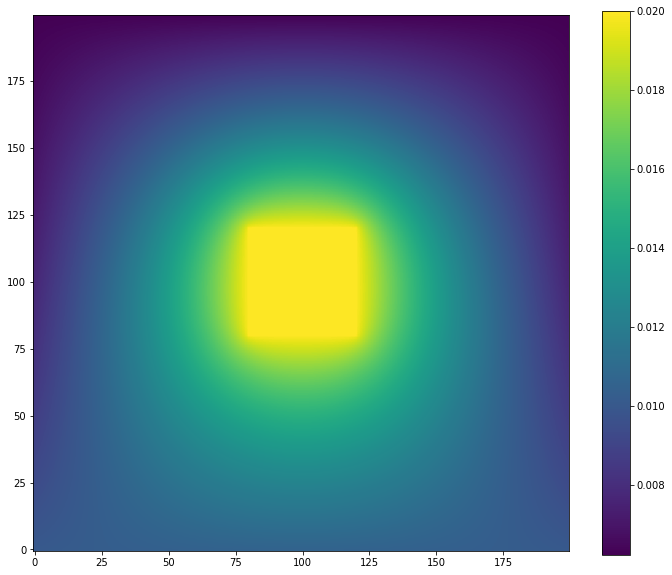

In [14]:
# Potencial da carga
def v_carga(x, y):
    return 1 / ( 4 * np.pi * np.sqrt((y + 10)**2 + x**2))


d = 2.5 # meia altura quadrado
n = 200 # número de pontos laterais
v = 0.02 # Potencial no condutor interior

phi = np.zeros((n, n), float) # array com o potencial inicial

# potencial na fronteira
pos_list = np.linspace(-d, d, n)
phi[0, :] = v_carga(pos_list, -d)
phi[-1, :] = v_carga(pos_list, d)
phi[:, 0] = v_carga(-d, pos_list)
phi[:, -1] = v_carga(d, pos_list)

# potencial no condutor
k1 = int((d - 0.5) * n / (2 * d))
k2 = int((d + 0.5) * n / (2 * d))
phi[k1:k2+1, k1:k2+1] = v


def jacobi(phi):
    a = 1 / (n - 1)
    phi1 = phi.copy()
    phi2 = phi1.copy()
    
    precision = 1e-8
    error = precision + 1
    
    while error > precision:
        phi2[1:-1, 1:-1] = (phi1[:-2, 1:-1] + phi1[2:, 1:-1] + phi1[1:-1, :-2] + phi1[1:-1, 2:]) / 4
        phi2[k1:k2+1, k1:k2+1] = v
        error = np.max(abs(phi2 - phi1))
        phi1 = phi2.copy()
    return phi2

results = jacobi(phi)
plt.figure(figsize=(12,10))
plt.imshow(results, origin="lower")
plt.colorbar()
plt.show()



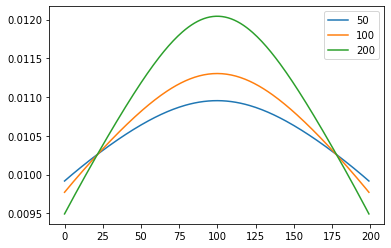

In [15]:
n = 50
results50 = jacobi(phi)
plt.plot(results50[int((d-2) / (2*d) * n), :], label="50") 

n = 100
results100 = jacobi(phi)
plt.plot(results100[int((d-2) / (2*d) * n), :], label="100")

n = 200
results200 = jacobi(phi)
plt.plot(results200[int((d-2) / (2*d) * n), :], label="200")

plt.legend()
plt.show()